In [87]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import statistics
dir_path = "/home/eric/Documents/cervicalResearchIIP/result_test/U-Net (MRCNN)"

mcu_net_images = []
mcu_net_fn = []

mrcnn_images = []
mrcnn_fn = []

# Loop through fold1 to fold4
for i in range(1, 5):
    fold_mcunet = []
    fold_mcunet_fn = []
    
    fold_mrcnn = []
    fold_mrcnn_fn = []
    fold_path = os.path.join(dir_path, f'fold{i}', 'crf')
    
    if not os.path.exists(fold_path):
        continue
    
    all_filenames = sorted([f for f in os.listdir(fold_path) if f.endswith('.png')])
    
    for filename in all_filenames:
        if filename.endswith('.png'):
            img_path = os.path.join(fold_path, filename)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                continue  # Skip unreadable images
            if filename.startswith('N'):
                fold_mcunet.append(image)
                fold_mcunet_fn.append(filename)
            elif filename.startswith('M'):
                fold_mrcnn.append(image)
                fold_mrcnn_fn.append(filename)
    
    mcu_net_images.append(fold_mcunet)
    mcu_net_fn.append(fold_mcunet_fn)
    
    mrcnn_images.append(fold_mrcnn)
    mrcnn_fn.append(fold_mrcnn_fn)

# Now n_images and m_images contain the loaded cv2 images
print(f'Total N images: {len(mcu_net_images)}')
print(f'Total M images: {len(mcu_net_fn)}')
print(mcu_net_fn)

print(f'Total N images: {len(mrcnn_images)}')
print(f'Total M images: {len(mrcnn_fn)}')

print(mrcnn_fn)

Total N images: 4
Total M images: 4
[['N1-2.png', 'N1-4.png', 'N1-6.png', 'N2-1.png', 'N2-2.png', 'N3-2.png', 'N3-3.png', 'N3-9.png', 'N4-1.png', 'N4-6.png', 'N5-1.png', 'N5-6.png'], ['N1-3.png', 'N1-8.png', 'N1-9.png', 'N2-10.png', 'N2-5.png', 'N3-10.png', 'N3-6.png', 'N3-7.png', 'N4-4.png', 'N4-7.png', 'N5-3.png'], ['N1-10.png', 'N1-5.png', 'N2-4.png', 'N2-6.png', 'N2-9.png', 'N3-4.png', 'N3-8.png', 'N4-3.png', 'N4-8.png', 'N4-9.png', 'N5-5.png'], ['N1-1.png', 'N1-7.png', 'N2-3.png', 'N2-7.png', 'N2-8.png', 'N3-1.png', 'N3-5.png', 'N4-2.png', 'N4-5.png', 'N5-2.png', 'N5-4.png']]
Total N images: 4
Total M images: 4
[['Mask_RCNN_N1-2.png', 'Mask_RCNN_N1-4.png', 'Mask_RCNN_N1-6.png', 'Mask_RCNN_N2-1.png', 'Mask_RCNN_N2-2.png', 'Mask_RCNN_N3-2.png', 'Mask_RCNN_N3-3.png', 'Mask_RCNN_N3-9.png', 'Mask_RCNN_N4-1.png', 'Mask_RCNN_N4-6.png', 'Mask_RCNN_N5-1.png', 'Mask_RCNN_N5-6.png'], ['Mask_RCNN_N1-3.png', 'Mask_RCNN_N1-8.png', 'Mask_RCNN_N1-9.png', 'Mask_RCNN_N2-10.png', 'Mask_RCNN_N2-5.png

In [88]:
def file_names_with_prefix(directory_path, prefix):

    # Initialize an empty list to store the file names without extensions
    file_names_without_extension = []

    # Loop through all files in the specified directory
    for filename in os.listdir(directory_path):
        #Checking if the file in loop exists in the directory_path not sure how is this necessary
        #??
        if os.path.isfile(os.path.join(directory_path, filename)):
            # Check if the file name starts with the specified prefix
            if filename.startswith(prefix):
                # Get the file name without extension
                name_without_extension, _ = os.path.splitext(filename)

                # Append the file name (without extension) to the list
                file_names_without_extension.append(name_without_extension)

    # Sort the list of file names without extensions in ascending order
    sorted_file_names = sorted(
        file_names_without_extension,
        key=lambda x: (x.split('-')[0], int(x.split('-')[1]))
    )  # Modify this part based on your file naming convention

    # Now you have a sorted list of file names with the specified prefix and without extensions
    return sorted_file_names

In [89]:
labeled_dir = str("/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled")
def cal_DiceMulitple(dir, input_name):
    # change the label count as your preference
    Dice = [0] * 11
    Count1 = [0] * 11 #予測結果の各ラベルの要素数
    Count2 = [0] * 11 #ラベル画像の
    Count3 = [0] * 11 #正解した画素数
    
    for index in range(len(input_name)):
        print('index = ', index)

        img1 = cv2.imread(dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(labeled_dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        #_, img2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY)
        print("予測画像:", dir  + '/' + input_name[index] + ".png")
        print("テストラベル:", labeled_dir + '/' + input_name[index] + ".png")
        unique_label1 = np.unique(img1)
        unique_label2 = np.unique(img2)
        # print(unique_label1)
        # print(unique_label2)
        # change the image array size to your need
        for n in range(256):
            for l in range(256):
                value1 = img1[n,l]
                # for index, uq_value in enumerate(unique_label1):
                #     if(value1 == uq_value):
                #         value1 = index

                Count1[value1] += 1

                value2 = img2[n,l]
                Count2[value2] += 1                    

                if(value1 == value2):
                    Count3[value1] += 1 
    for i in range(11):
        if(Count1[i]+Count2[i] != 0):
            Dice[i] = (2*Count3[i])/(Count1[i] + Count2[i])
        if(Count1[i]+Count2[i] == 0):
            print("")
            #print("4 label case:" + str(input_name[index]))
    Dice.append(statistics.mean(Dice[1:]))
    print('Count1 = ', Count1)
    print('Count2 = ', Count2)
    print('Count3 = ', Count3)
    print('Dice = ', Dice)
    #print(unique_label)

    return Dice

In [90]:
labeled_dir = str("/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled")
def cal_DiceMulitpleAlt(img1, input_name):
    # change the label count as your preference
    Dice = [0] * 11
    Count1 = [0] * 11 #予測結果の各ラベルの要素数
    Count2 = [0] * 11 #ラベル画像の
    Count3 = [0] * 11 #正解した画素数
    
    for index in range(len(input_name)):
        #print('index = ', index)

        img2 = cv2.imread(labeled_dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        #_, img2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY)
        #print("予測画像:", dir  + '/' + input_name[index] + ".png")
        #print("テストラベル:", labeled_dir + '/' + input_name[index] + ".png")
        unique_label1 = np.unique(img1)
        unique_label2 = np.unique(img2)
        # print(unique_label1)
        # print(unique_label2)
        # change the image array size to your need
        for n in range(256):
            for l in range(256):
                value1 = img1[n,l]
                # for index, uq_value in enumerate(unique_label1):
                #     if(value1 == uq_value):
                #         value1 = index

                Count1[value1] += 1

                value2 = img2[n,l]
                Count2[value2] += 1                    

                if(value1 == value2):
                    Count3[value1] += 1 
    for i in range(11):
        if(Count1[i]+Count2[i] != 0):
            Dice[i] = (2*Count3[i])/(Count1[i] + Count2[i])
        if(Count1[i]+Count2[i] == 0):
            print("")
            #print("4 label case:" + str(input_name[index]))
    Dice.append(statistics.mean(Dice[1:]))
    #print('Count1 = ', Count1)
    #print('Count2 = ', Count2)
    #print('Count3 = ', Count3)
    #print('Dice = ', Dice)
    #print(unique_label)

    return Dice

In [91]:
def euclidean_dst(x1, y1, x2, y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

In [92]:
def connected(mask):
    if mask.dtype != np.uint8:
        mask = np.uint8(mask * 255 if mask.max() == 1 else mask)
    
    # find if mask of class i is connected as whole or scattered using connected component analysis
    # first parameter is the mask, 8 pixel neighbor rule (surrounding 8 pixels of single pixel is considered neighbor)
    num_labels, labels_matrix, stats, centroids = cv2.connectedComponentsWithStats(mask, 8, cv2.CV_32S)
    
    object_count = num_labels - 1
    
    return int(object_count==1)

In [99]:

#binary class gets 256x256 two masks containing either 0 or class_number
#ensembles them
def ensemble(s_u, s_m, class_number, logic_gate):
    ## final combination mask init
    combination_mask = np.zeros((256, 256), dtype = np.int8)
    ## coefficient for dst threshold between seg points of two seg outs
    priority = 0
    dst_threshold = 2.0
    upp_dst_threshold = 8.0
    area_ratio_threshold = 200
    
    
    ## calculating total area and mean position of mask segmentation
    x_points_u = []
    y_points_u = []
    SA_u = 0
    
    x_points_m = []
    y_points_m = []
    SA_m = 0
    
    for y in range(256):
        for x in range(256):
            if s_u[y,x] != 0:
                x_points_u.append(x)
                y_points_u.append(y)
                SA_u += 1
            if s_m[y,x] != 0:
                x_points_m.append(x)
                y_points_m.append(y)
                SA_m += 1

    mean_u_x = np.round(np.mean(x_points_u))
    mean_u_y = np.round(np.mean(y_points_u))
    
    mean_m_x= np.round(np.mean(x_points_m))
    mean_m_y = np.round(np.mean(y_points_m))
    
    
    
    print(f"DST: {euclidean_dst(mean_u_x, mean_u_y, mean_m_x, mean_m_y)}")
    print(f"SA_U: {SA_u}, SA_M: {SA_m}")
    print(f"Connected: {bool(connected(s_u))}")
    #ensemble logic
    if np.isnan(mean_m_x) and np.isnan(mean_m_y): ## mrcnn removed whole class
        logic_gate[0] += 1
        print(f"Class: {class_number}, logic gate: 1, mrcnn removed whole class")
        for y in range(256):
            for x in range(256):
                combination_mask[y, x] = s_u[y, x]
    elif np.isnan(mean_u_x) and np.isnan(mean_u_y): ## unet could not segment whole class, doesnt happen because even if seg leaves whole boin it always tries to fit every class in one mask
        print(f"Class: {class_number}, logic gate: 2, unet did not segment whole class")
        logic_gate[1] += 1
        for y in range(256):
            for x in range(256):
                combination_mask[y, x] = s_m[y, x]                               
    elif euclidean_dst(mean_u_x, mean_u_y, mean_m_x, mean_m_y) < dst_threshold and connected(s_u) == 1: #normal case where classes are close get union/or gate
        print(f"Class: {class_number}, logic gate: 3, normal accurate accept unet only")
        logic_gate[2] += 1
        for y in range(256):
            for x in range(256):
                if s_u[y, x] == class_number: #or s_m[y, x] == class_number:
                        combination_mask[y, x] = class_number
    elif euclidean_dst(mean_u_x, mean_u_y, mean_m_x, mean_m_y) < upp_dst_threshold: ## leak/patchy error detected
        print(f"Class: {class_number}, logic gate: 4, possible leak")
        logic_gate[3] += 1
        priority = 1
        if connected(s_u) == 0: #or np.absolute(SA_m - SA_u) > area_ratio_threshold:
            print("Leak detected")
            for y in range(256):
                for x in range(256):
                    #if SA_u / SA_m < 1.1 and  SA_u / SA_m < 0.9: ## accept mrcnn leaky case speculation
                    #print(f"Class {class_number}: 4-1")
                    combination_mask[y, x] = s_m[y,x]
        else:
            print("False Leak detected")
            for y in range(256):
                for x in range(256):
                    combination_mask[y, x] = s_u[y,x]
        
            
    else: ## masks are far from each other, possibility: mrcnn labeled other area as this class
        print(f"Class: {class_number}, logic gate: 5, two masks are far, mrcnn label error")
        logic_gate[4] += 1
        for y in range(256):
            for x in range(256):
                combination_mask[y, x] = s_u[y, x] ## accept unet as is
                
    return combination_mask, logic_gate, priority

************Ensemble************
DST: 1.4142135623730951
SA_U: 1417, SA_M: 1440
Connected: True
Class: 1, logic gate: 3, normal accurate accept unet only


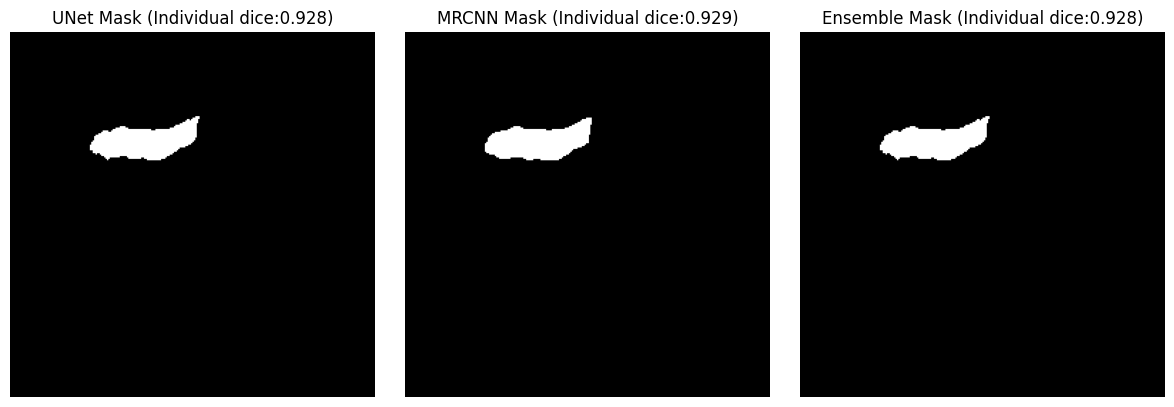

DST: 0.0
SA_U: 844, SA_M: 886
Connected: True
Class: 2, logic gate: 3, normal accurate accept unet only


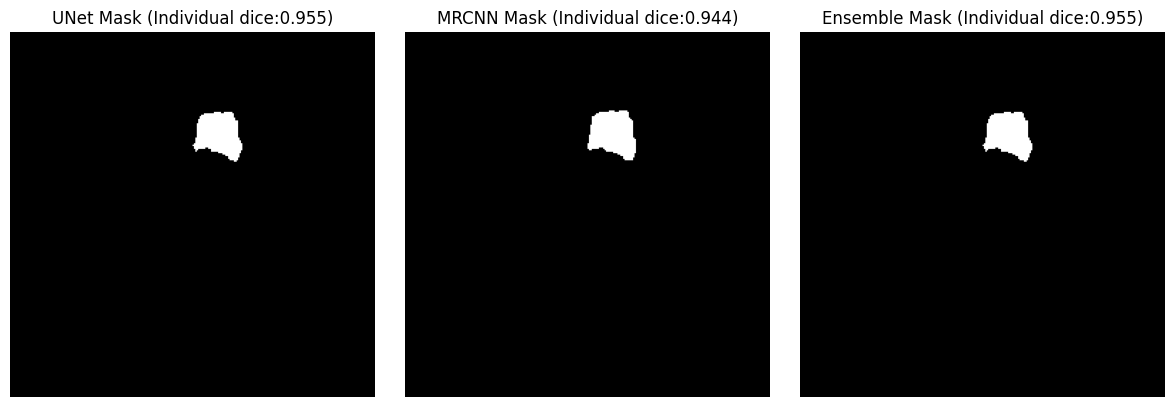

DST: 1.4142135623730951
SA_U: 847, SA_M: 881
Connected: True
Class: 3, logic gate: 3, normal accurate accept unet only


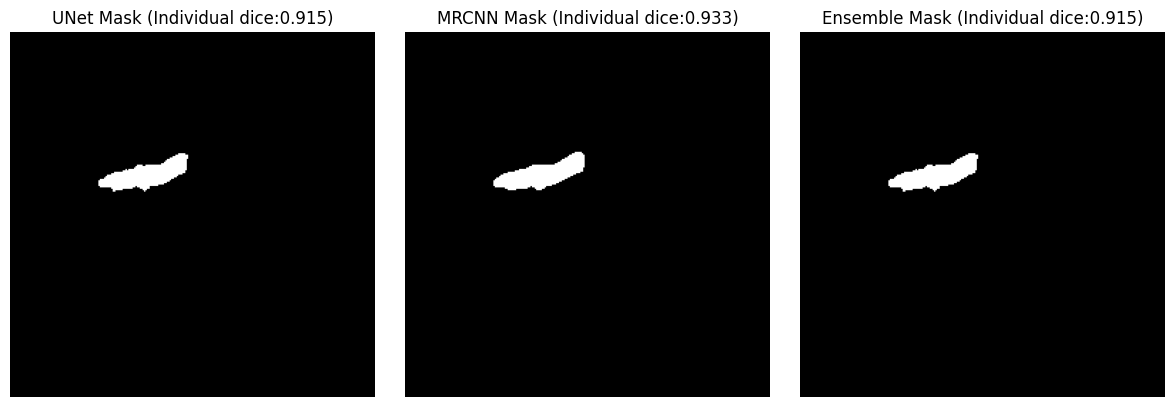

DST: 1.4142135623730951
SA_U: 563, SA_M: 549
Connected: True
Class: 4, logic gate: 3, normal accurate accept unet only


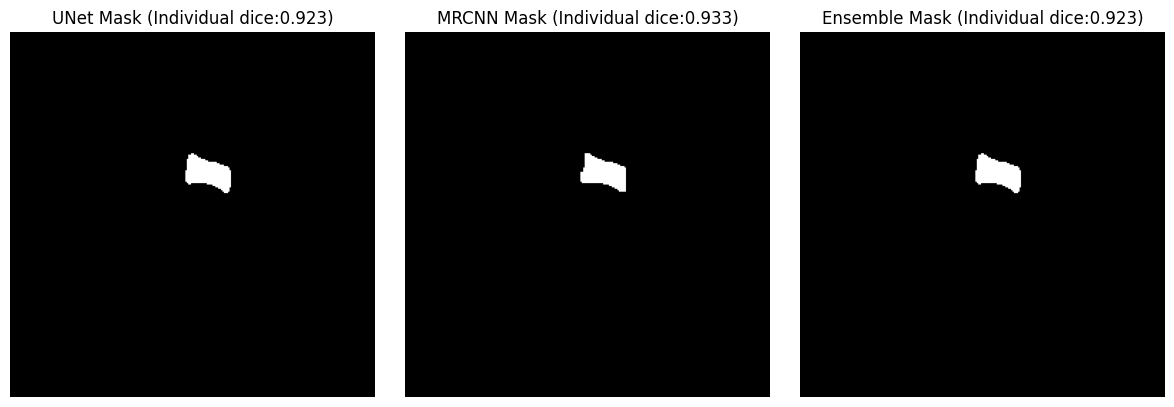

DST: 1.4142135623730951
SA_U: 547, SA_M: 852
Connected: False
Class: 5, logic gate: 4, possible leak
Leak detected


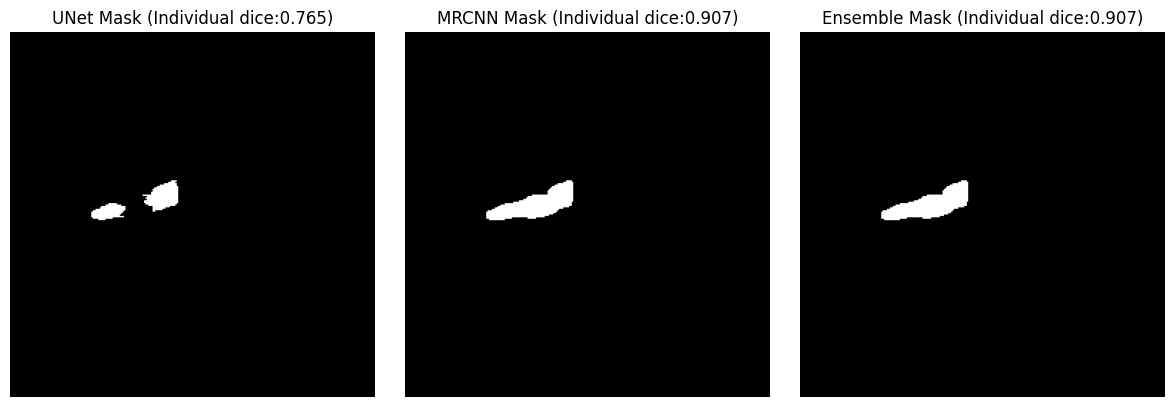

DST: 0.0
SA_U: 544, SA_M: 545
Connected: True
Class: 6, logic gate: 3, normal accurate accept unet only


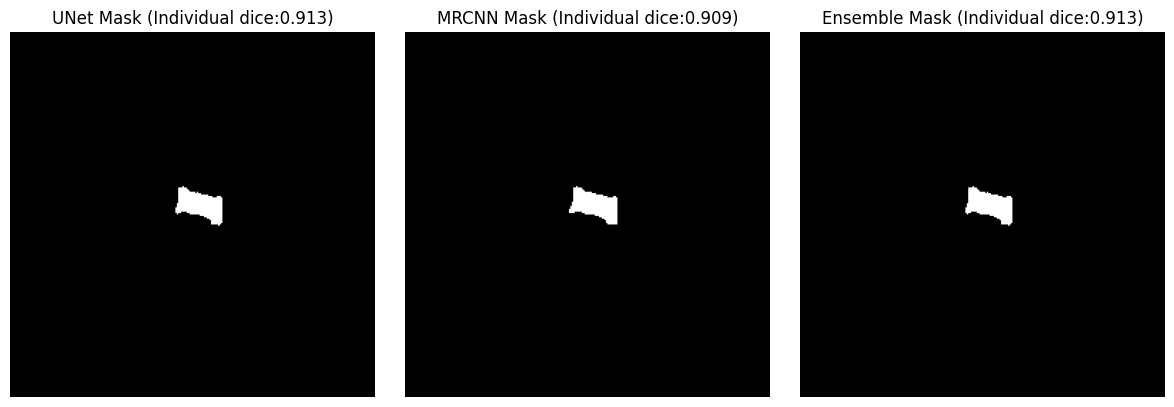

DST: 5.385164807134504
SA_U: 1017, SA_M: 780
Connected: False
Class: 7, logic gate: 4, possible leak
Leak detected


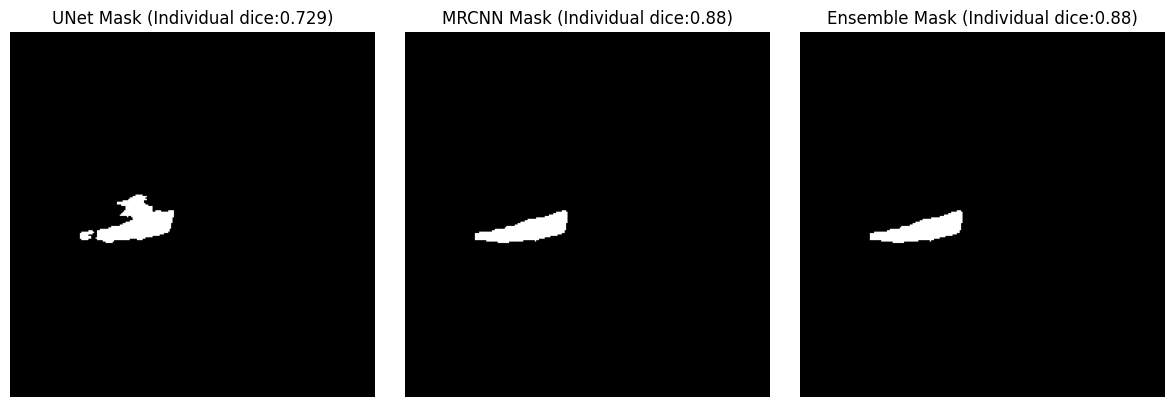

DST: 4.123105625617661
SA_U: 393, SA_M: 538
Connected: False
Class: 8, logic gate: 4, possible leak
Leak detected


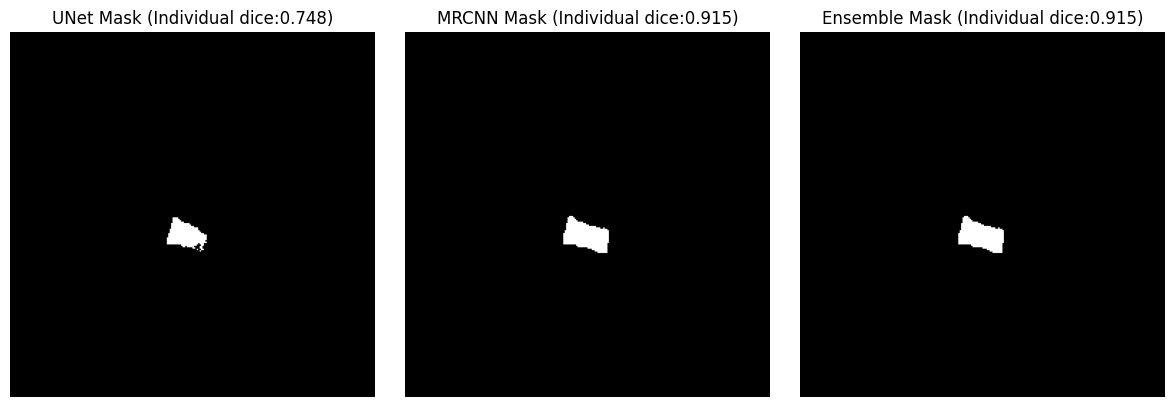

DST: 1.0
SA_U: 1123, SA_M: 1195
Connected: False
Class: 9, logic gate: 4, possible leak
Leak detected


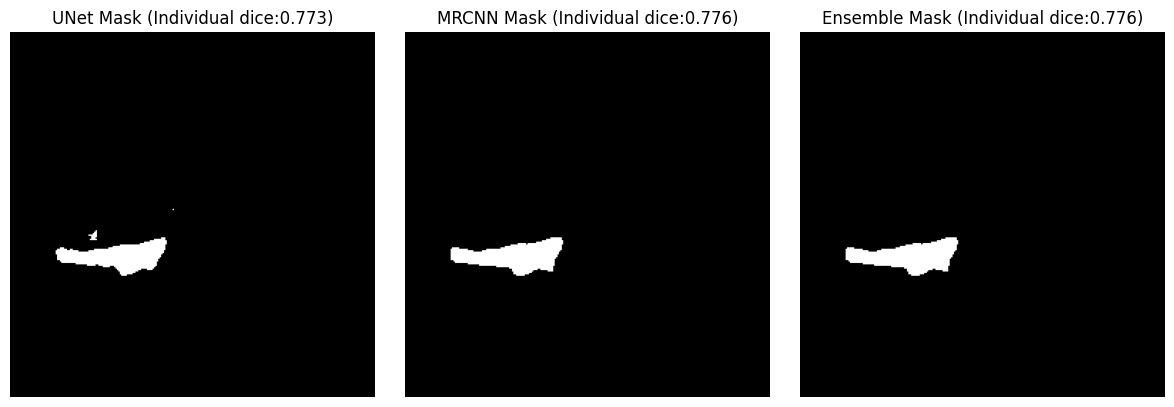

DST: 7.0710678118654755
SA_U: 561, SA_M: 395
Connected: False
Class: 10, logic gate: 4, possible leak
Leak detected


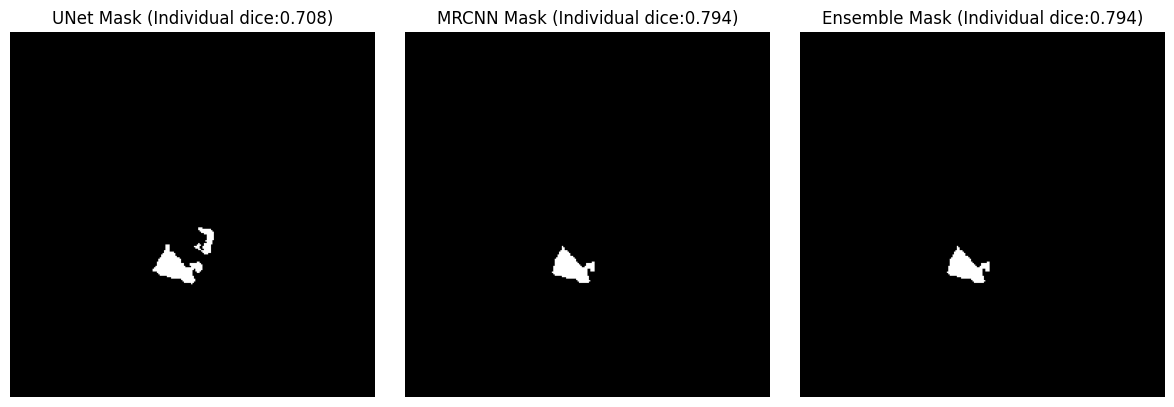

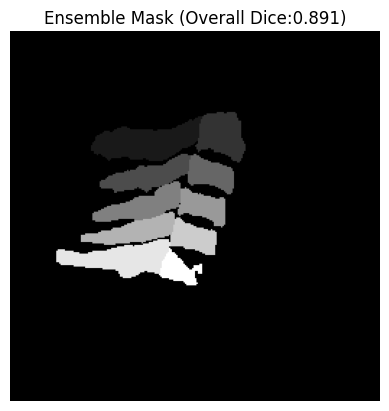

Logic gate 1 used: 0 times.
Logic gate 2 used: 0 times.
Logic gate 3 used: 5 times.
Logic gate 4 used: 5 times.
Logic gate 5 used: 0 times.


In [100]:
#4-6, 5-1, 4-1, 2-1, 1-4, 1-2, 2-10, 3-10, 5-3, 1-10, 4-3

#still error: 1-4, cuz of bad segmentations in the first place
# test_case = "N4-9"

# for i_fold, fold in enumerate(mcu_net_fn):
#     for index, fn in enumerate(fold):
#         if fn.startswith(test_case):
#             test_fold = i_fold
#             test_fn_index = index            

# print(mcu_net_fn[test_fold][test_fn_index])
# test_mask_unet = mcu_net_images[test_fold][test_fn_index]
# test_mask_unet = np.array(test_mask_unet)




# for i_fold, fold in enumerate(mrcnn_fn):
#     for index, fn in enumerate(fold):
#         if fn.startswith("Mask_RCNN_" + test_case):
#             test_fold = i_fold
#             test_fn_index = index            

# print(mrcnn_fn[test_fold][test_fn_index])
# test_mask_mrcnn = mrcnn_images[test_fold][test_fn_index]
# test_mask_mrcnn = np.array(test_mask_mrcnn)

mcu_net_images.append(fold_mcunet)
mcu_net_fn.append(fold_mcunet_fn)

mrcnn_images.append(fold_mrcnn)
mrcnn_fn.append(fold_mrcnn_fn)


print("************Ensemble************")
logic_gate = [0, 0, 0, 0, 0]
ensembled_masks = []
for index_fold, (fold_u, fold_m) in enumerate(zip(mcu_net_images, mrcnn_images)):
    combined_fold = []
    for index_file, (test_mask_unet, test_mask_mrcnn) in enumerate(zip(fold_u, fold_m)):
        prio = []
        combined_mask = np.zeros((256, 256), dtype = np.int8)
        if mcu_net_fn[index_fold][index_file] != 'N2-2.png':
            continue
        for i in range(1, 11):
            unet_class_i = np.zeros((256, 256), dtype = np.int8)
            mrcnn_class_i = np.zeros((256, 256), dtype = np.int8)
            for y in range(256):
                for x in range(256):
                    if test_mask_unet[y, x] == i:
                        unet_class_i[y, x] = i
                    if test_mask_mrcnn[y, x] == i:
                        mrcnn_class_i[y, x] = i
            combined_mask_i, logic_gate, priority = ensemble(unet_class_i, mrcnn_class_i, i, logic_gate)
            Dice_i_u = np.round(cal_DiceMulitpleAlt(unet_class_i, [mcu_net_fn[index_fold][index_file][:-4]]), 3)
            Dice_i_m = np.round(cal_DiceMulitpleAlt(mrcnn_class_i, [mcu_net_fn[index_fold][index_file][:-4]]), 3)
            Dice_i_ensemble = np.round(cal_DiceMulitpleAlt(combined_mask_i, [mcu_net_fn[index_fold][index_file][:-4]]), 3)
            
            if priority == 1:
                for y in range(256):
                    for x in range(256):
                        if combined_mask_i[y, x] != 0 and combined_mask_i[y, x] == i:
                            prio.append([y,x])
            
            fig, axes = plt.subplots(1, 3, figsize=(12, 4)) # figsize=(width, height) in inches

            # 2. Plot the first image
            axes[0].imshow(unet_class_i, cmap='gray')
            axes[0].set_title(f'UNet Mask (Individual dice:{Dice_i_u[i]})') # Caption for the first plot
            axes[0].axis('off') # Hide axis

            # 3. Plot the second image
            axes[1].imshow(mrcnn_class_i, cmap='gray')
            axes[1].set_title(f'MRCNN Mask (Individual dice:{Dice_i_m[i]})') # Caption for the second plot
            axes[1].axis('off') # Hide axis

            # 4. Plot the third image
            axes[2].imshow(combined_mask_i, cmap='gray')
            axes[2].set_title(f'Ensemble Mask (Individual dice:{Dice_i_ensemble[i]})') # Caption for the third plot
            axes[2].axis('off') # Hide axis

            # 5. Adjust layout to prevent titles from overlapping and display the plot
            plt.tight_layout()
            plt.show()
            
            
            for y in range(256):
                for x in range(256):
                    if combined_mask_i[y, x] != 0 and combined_mask_i[y, x] == i:
                        #if [y, x] in prio and priority == 1:
                        #   continue #mrcnn is not allowed to be overwritten
                        combined_mask[y, x] = combined_mask_i[y, x]
                    
        Dice_i_combined = np.round(cal_DiceMulitpleAlt(combined_mask, [mcu_net_fn[index_fold][index_file][:-4]]), 3)

        plt.imshow(combined_mask, cmap='gray')
        plt.title(f'Ensemble Mask (Overall Dice:{Dice_i_combined[-1]})') # Caption for the third plot
        plt.axis('off')  # Hide axis
        plt.show()
        
        
        combined_fold.append(combined_mask)
        
    ensembled_masks.append(combined_fold)
for i in range(5):
    print(f"Logic gate {i+1} used: {logic_gate[i]} times.")

In [95]:
# from pathlib import Path
# for i in range(4):

#     # Saving the crf enhanced images into crf dir

#     # Create the crftestdir path
#     ensemble_dir = dir_path + "/fold" +str(i+1) + "/crf/ensemble"
#     # Convert to Path object for easier manipulation
#     ensemble_path = Path(ensemble_dir)

#     # Create the crf directory if it does not exist
#     if not ensemble_path.exists():
#         ensemble_path.mkdir(parents=True, exist_ok=True)
#     refined_labels_case = ensembled_masks[i]
#     refined_labels_fn = mcu_net_fn[i]
#     # Convert the array to uint8 type if necessary
#     for index, refined_label in enumerate(refined_labels_case):
#         cv2.imwrite(str(ensemble_path / refined_labels_fn[index]), refined_label)


In [96]:
# import pandas as pd
# for i in range(4):
#    ensemble_dir = dir_path + "/fold" +str(i+1) + "/crf/ensemble"

#    ensemble_img_pre = []

      
#    for fn in mcu_net_fn[i]:
#       prefix = fn
      
      
#       ensemble_img_pre.append(file_names_with_prefix(ensemble_dir, fn))
   
#    ensemble_img_pre1d = [item for sublist in ensemble_img_pre for item in sublist]

#    print(ensemble_img_pre1d)
#    print(f"***Fold:{i}***")
#    print("Ensemble results:")
#    Dice = cal_DiceMulitple(ensemble_dir, ensemble_img_pre1d)
#    df = pd.DataFrame(Dice)
#    df = df.T
#    df.to_csv(dir_path + "/EnsembleDice.csv", mode='a', header=False)



In [97]:
# print(prefix)
# print(ensemble_dir)
# print(type(prefix))

In [98]:
# print(mcu_net_fn)
# mcu_net_fn1d = [item for sublist in mcu_net_fn for item in sublist]
# print(mcu_net_fn1d)